In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset_agriculture_01.csv')

In [ ]:
# Replace all nan values in each column with the mean value of each corresponding column.
df = df.fillna(df.mean(skipna=True, axis=0), axis=0)

In [ ]:
del df['Rice_production']

In [ ]:
# Set upperbound and lowerbound, highest being 80 and lowest at 20.
df = df.clip(upper=80, lower=20)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfCorr = df.corr()
print(dfCorr)
p1 = sns.heatmap(df.corr())
# I realized that most data are outside the outlier of 80 and 20. The data that are outside the outlier are either removed or capped.
# For column other than temperature, humidity, and rice production are being capped and set to 20, Which is why there are only correlation between temerature and humidity.

Temparature -0.27310757720786105
Humidity 0.4092804883079994
Precipitation 0.42777279249101213
Wind_Speed -0.32885029872059374
Surface_Pressure 0.186998253875788
Profile_Soil_Moisture 0.4213659949666968
Surface_Soil_Wetness 0.41866946993687
Root_Soil_wetness 0.42320932636008646


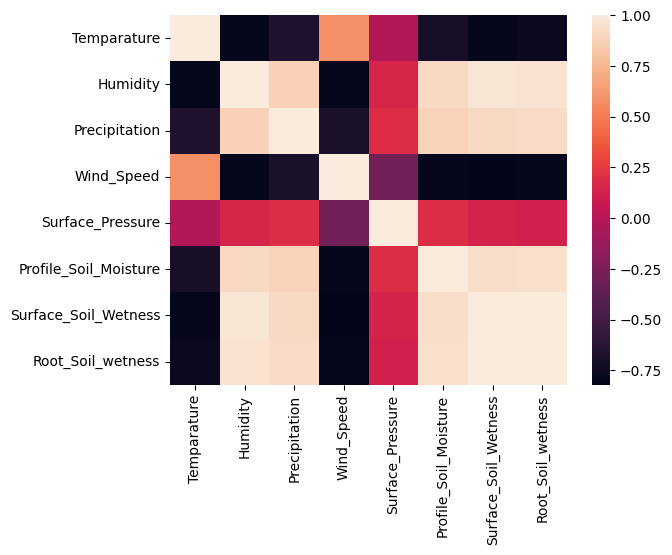

In [10]:
df = pd.read_csv('dataset_agriculture_01.csv')
df = df.fillna(df.mean(skipna=True, axis=0), axis=0)
del df['Rice_production']
dfCorr = df.corr()
for col in df.columns:
    print(col, np.average(dfCorr[col]))
p1 = sns.heatmap(df.corr())
# Back to squareone, I decided to repeat the steps above except for upper and lowerbound. The correlation and heatmap are much better.
# I took the average of each rows and this is the result.[-0.27310758  0.40928049  0.42777279 -0.3288503   0.18699825  0.42136599, 0.41866947  0.42320933]


In [ ]:
df = pd.read_csv('dataset_agriculture_01.csv')
df = df.fillna(df.mean(skipna=True, axis=0), axis=0)
dfCorr = df.corr()
print(dfCorr)
for col in df.columns:
    print(col, np.average(dfCorr[col]))
p1 = sns.heatmap(df.corr())
# After seeing the result above I wanted to see the result of the correlation with rice production. The result is very surprising becuase it has correlation that are better than some column.
# The average of correlation column went from [-0.27310758  0.40928049  0.42777279 -0.3288503   0.18699825  0.42136599, 0.41866947  0.42320933] to [-0.30163247  0.44752155  0.45984822 -0.36595584  0.17516431  0.46179562, 0.46186563  0.46736319]
# I noticed that most positive correlations went up, and the negative correlations went down.
# In the first part of this experiment I decided to remove rice production becuase the values are too big, and capped the upper and lower to 80 and 20. 
# This ended up removing 7 out of 9 features. The three most important features are Surface_Soil_Wetness, Root_Soil_wetness, and Profile_Soil_Moisture Because they has the largest outlier average.


In [ ]:
df = pd.read_csv('dataset_agriculture_01.csv')
df = df.fillna(df.mean(skipna=True, axis=0), axis=0)
for col in df.columns:
    df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())

dfCorr = df.corr()
print(dfCorr)
for col in df.columns:
    print(col, np.average(dfCorr[col]))
p1 = sns.heatmap(df.corr())
# In the cells above I did put the cap for value that are less than 20 and greater than 80 because that would end up ruing 7 out of 9 features.
# So Instead of capping I normalized each features, After I fill all the Nan values with average. Surprisingly the agerage correlation for each features 
# are the same as the un normalised data
